# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

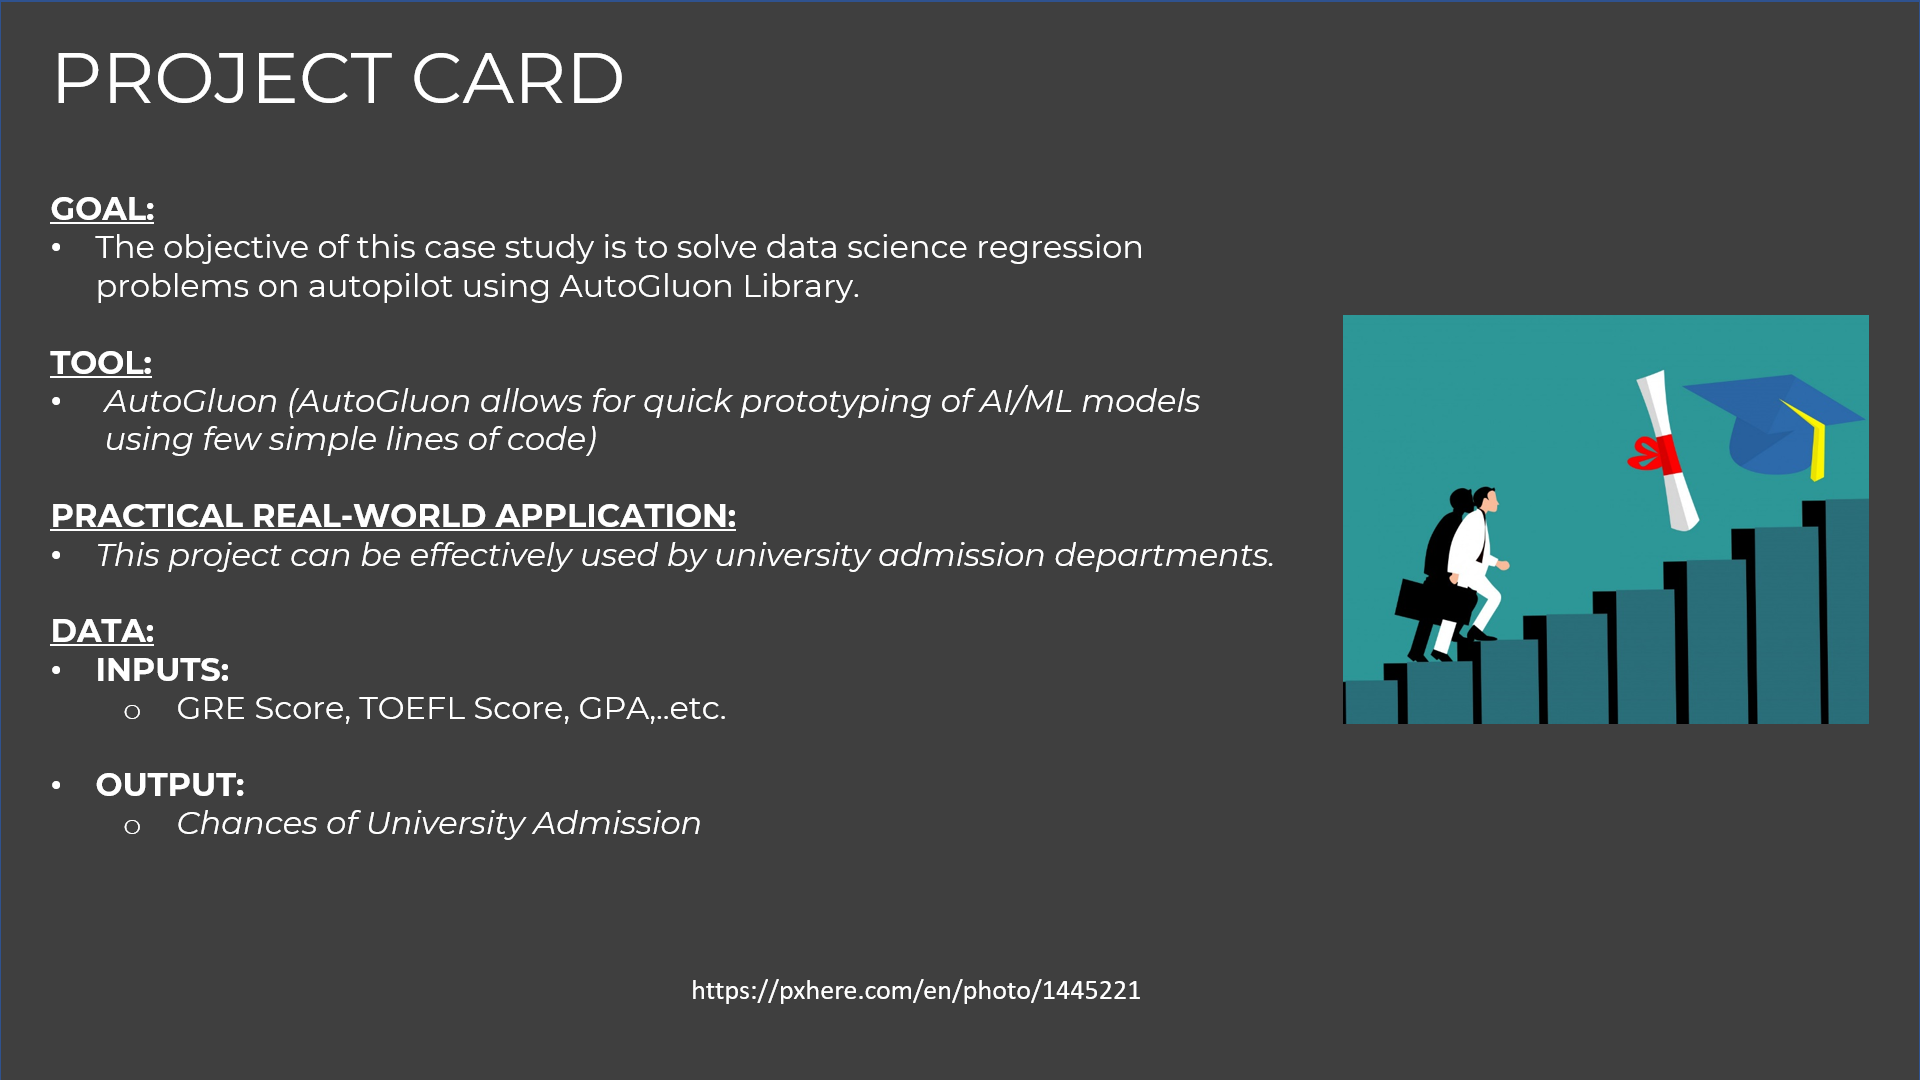

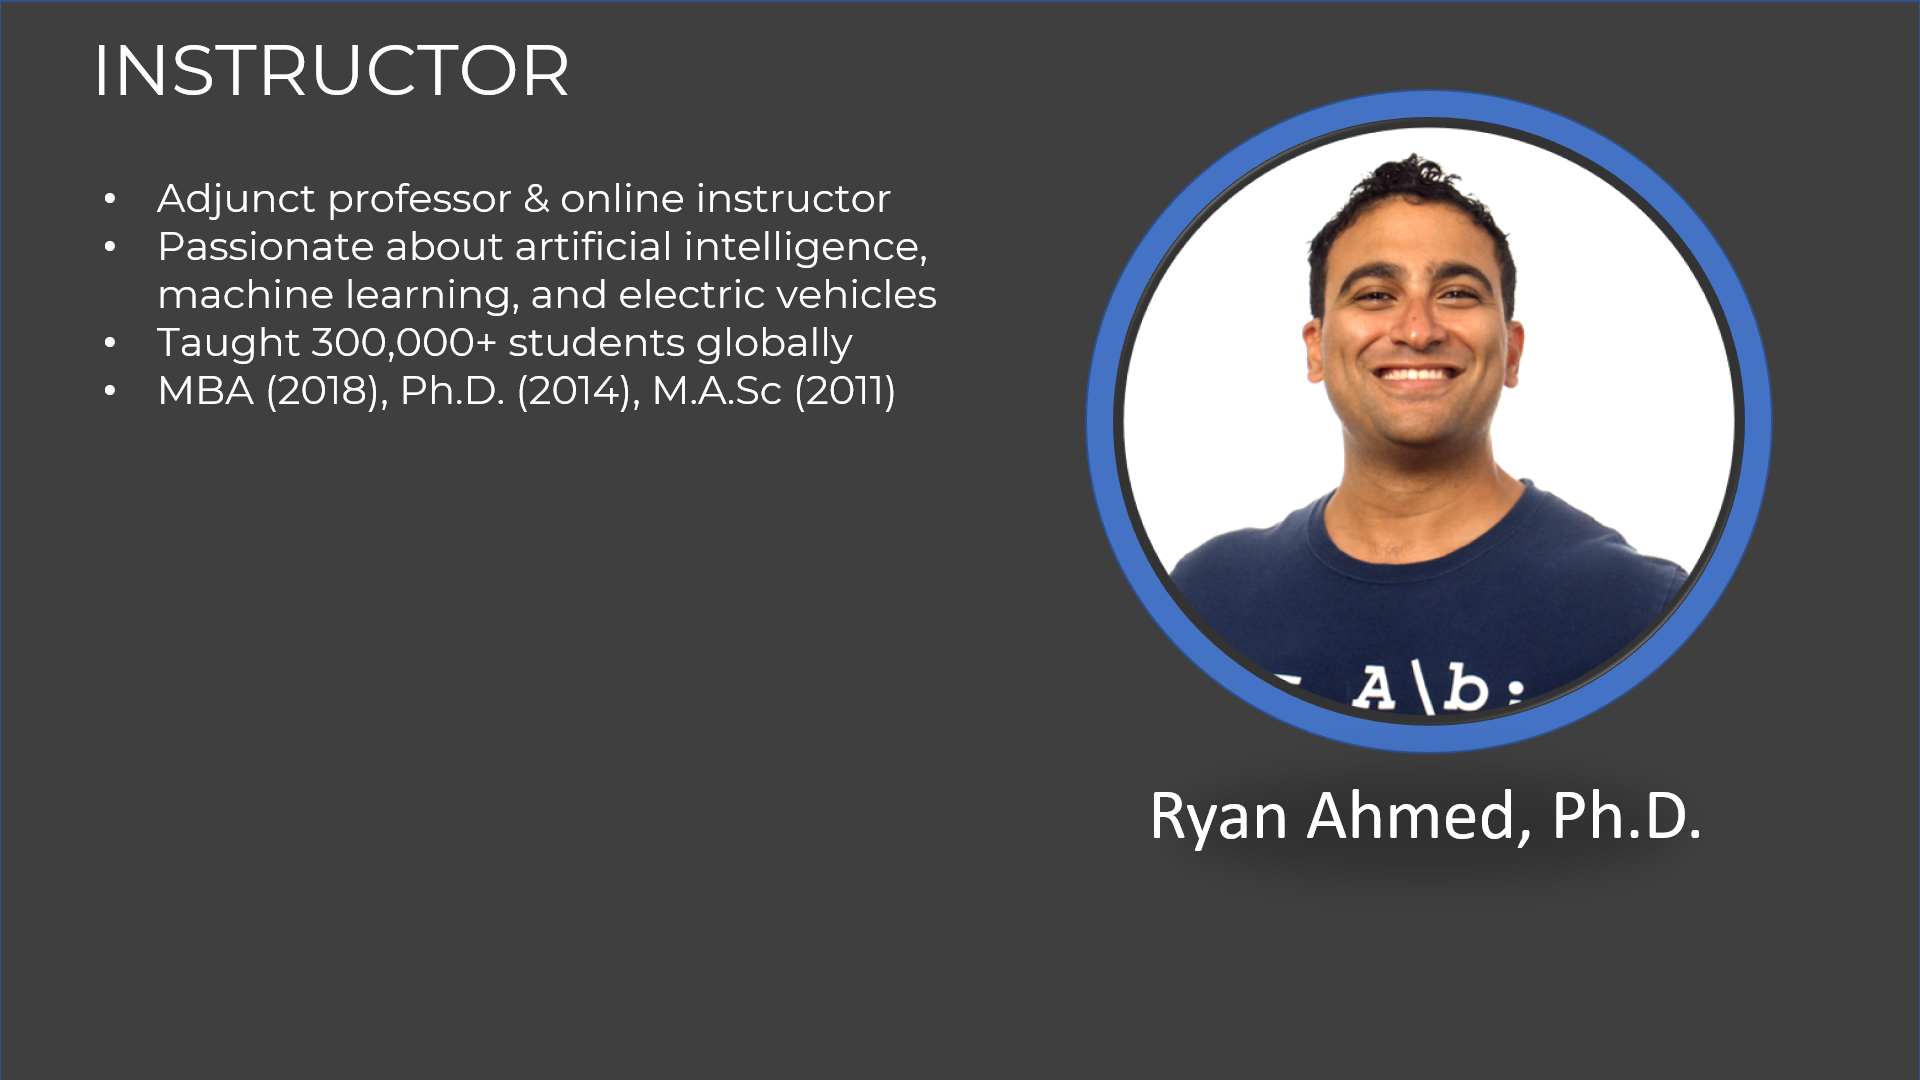

# TASK #2: IMPORT DATASETS & INSTALL AUTOGLUON (AWS AUTOPILOT)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
# !pip install autogluon --no-cache-dir
!pip install autogluon --user

     ---------------------------------------- 1.2/1.2 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.2.0
    Uninstalling setuptools-63.2.0:
      Successfully uninstalled setuptools-63.2.0


  Using cached numpy-1.16.6-cp37-cp37m-win_amd64.whl (11.9 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\administrator\\appdata\\roaming\\python\\python37\\site-packages\\~-mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.1.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.6.3 which is incompatible.
mxnet 1.7.0.post2 requires numpy<1.17.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
mxnet 1.7.0.post2 requires requests<2.19.0,>=2.18.4, but you have requests 2.28.1 which is incompatible.


  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
     ---------------------------------------- 9.0/9.0 MB 6.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of bcrypt to determine which version is compatible with other requirements. This could take a while.
  Using cached bcrypt-3.2.2-cp36-abi3-win_amd64.whl (29 kB)
INFO: pip is looking at multiple versions of attrs to determine which version is compatible with other requirements. This could take a while.
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
INFO: pip is looking at multiple versions of atomicwrites to determine which version is compatible with other requirements. This could take a while.
  Using cached atomicwrites-1.4.1-py2.py3-none-any.whl
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.11-py2.py3-none-any.whl 

In [3]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [51]:
df = pd.read_csv('university_admission.csv')

In [52]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **Calculate the average, minimum and maximum Chances of Admission in the DataFrame**

# TASK #3: OBTAIN DATA STATISTICAL SUMMARY

In [6]:
# Explore the first five rows in the DataFrame
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Explore the last five rows in the DataFrame
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [8]:
# Generate statistical summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
# Obtain dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# TASK #4: VISUALIZE DATA

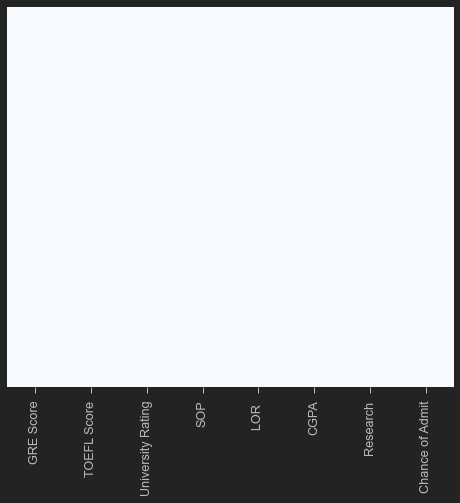

In [10]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [11]:
# check if there are any Null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

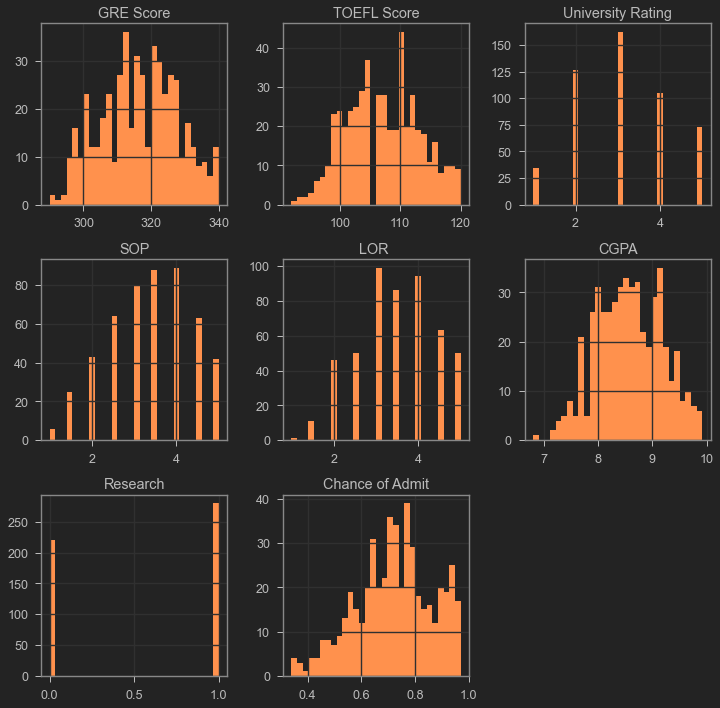

In [12]:
df.hist(bins = 30, figsize = (12, 12), color = 'y');

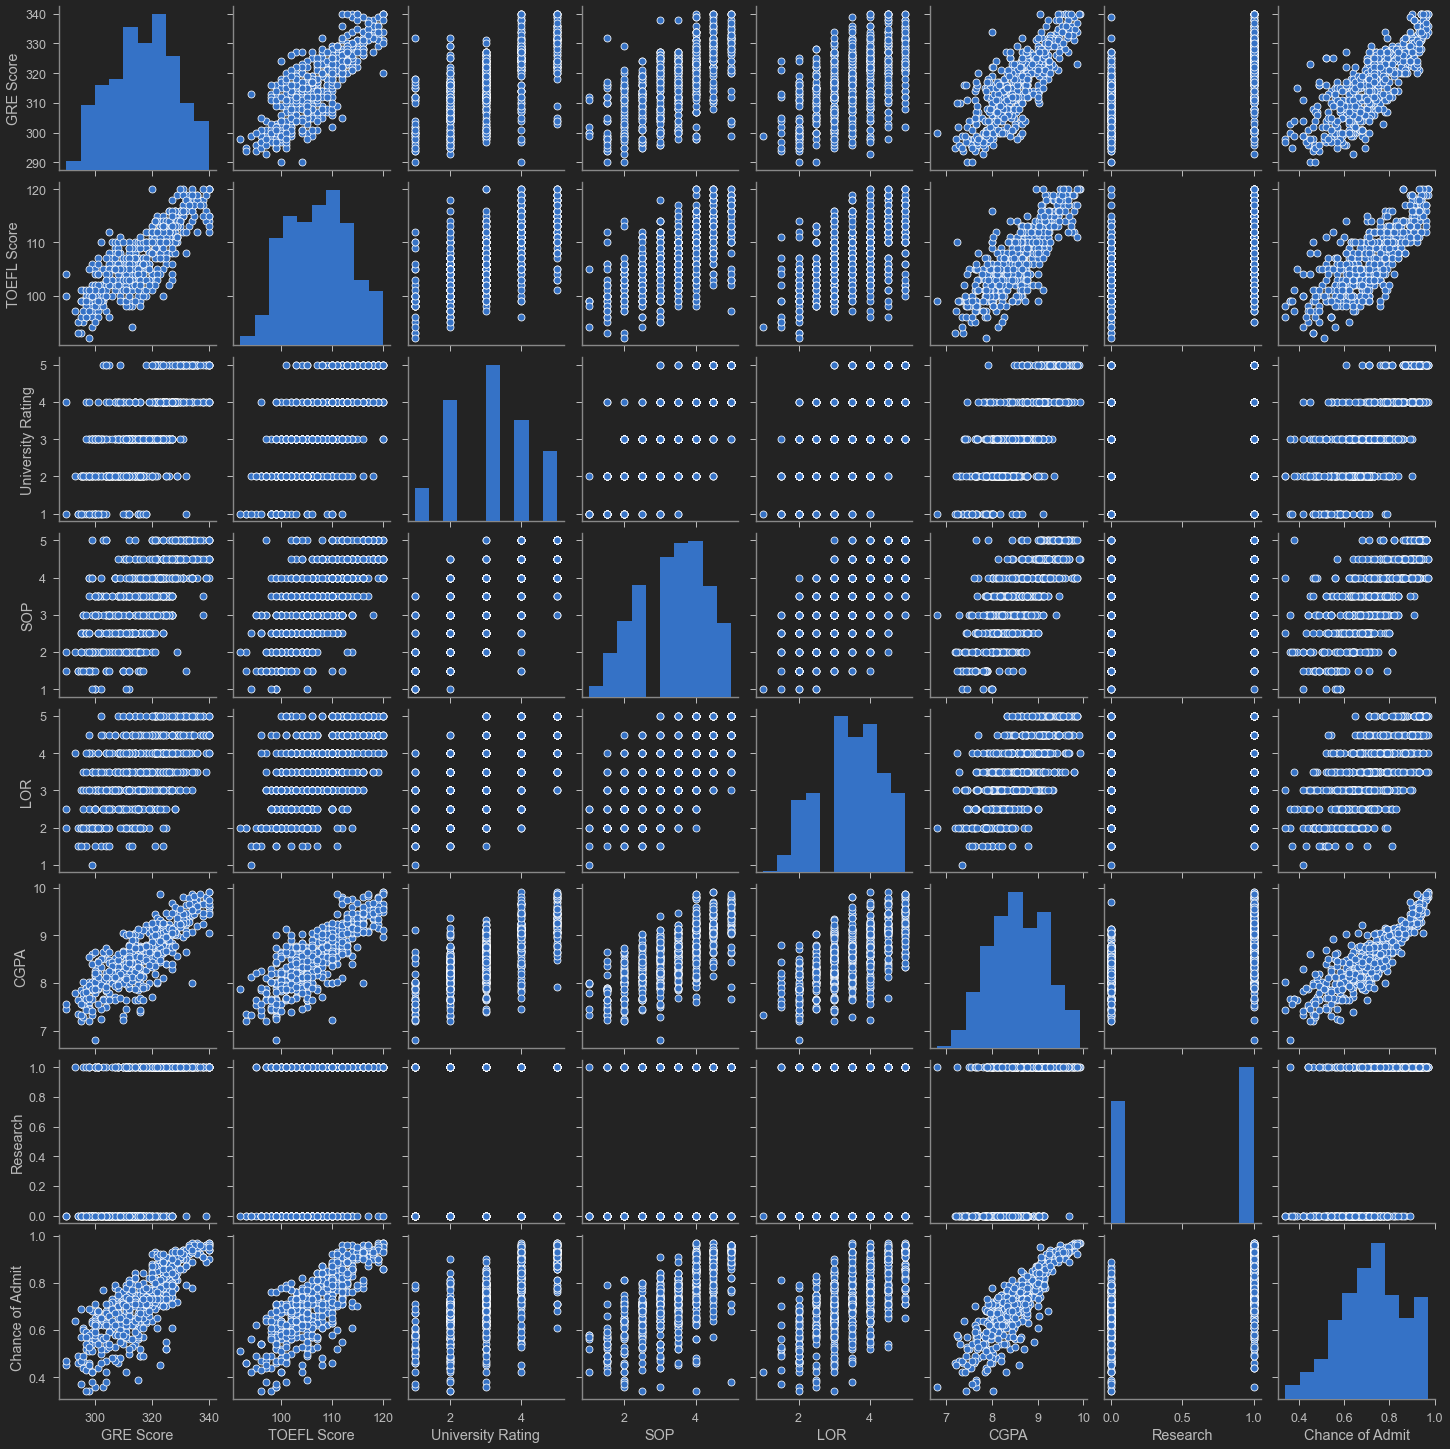

In [13]:
# plot pairplot
sns.pairplot(df);

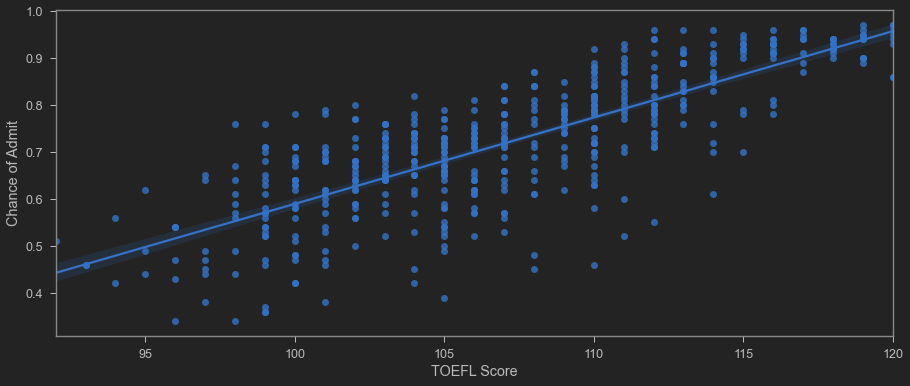

In [14]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'TOEFL Score', y = 'Chance of Admit', data = df)
plt.show()

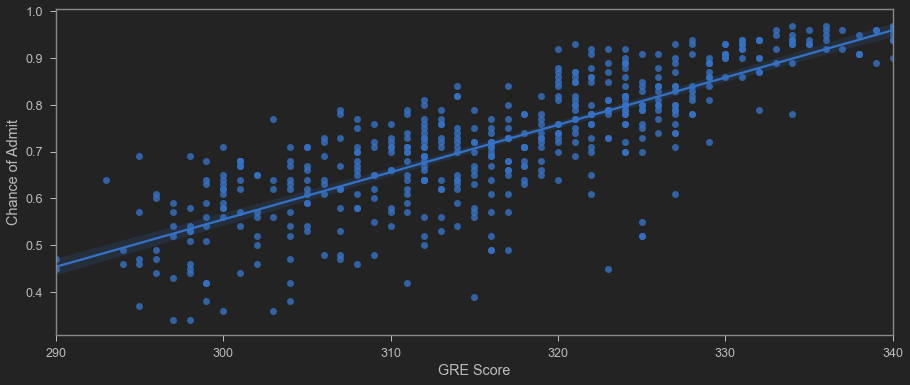

In [15]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'GRE Score', y = 'Chance of Admit', data = df)
plt.show()
  

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Calculate the correlation matrix and display a heatmap using Seaborn**
 - **Which feature has the most positive correlation with chances of university admission?**

# TASK #5: UNDERSTAND AWS AUTOGLUON FUNDAMENTALS

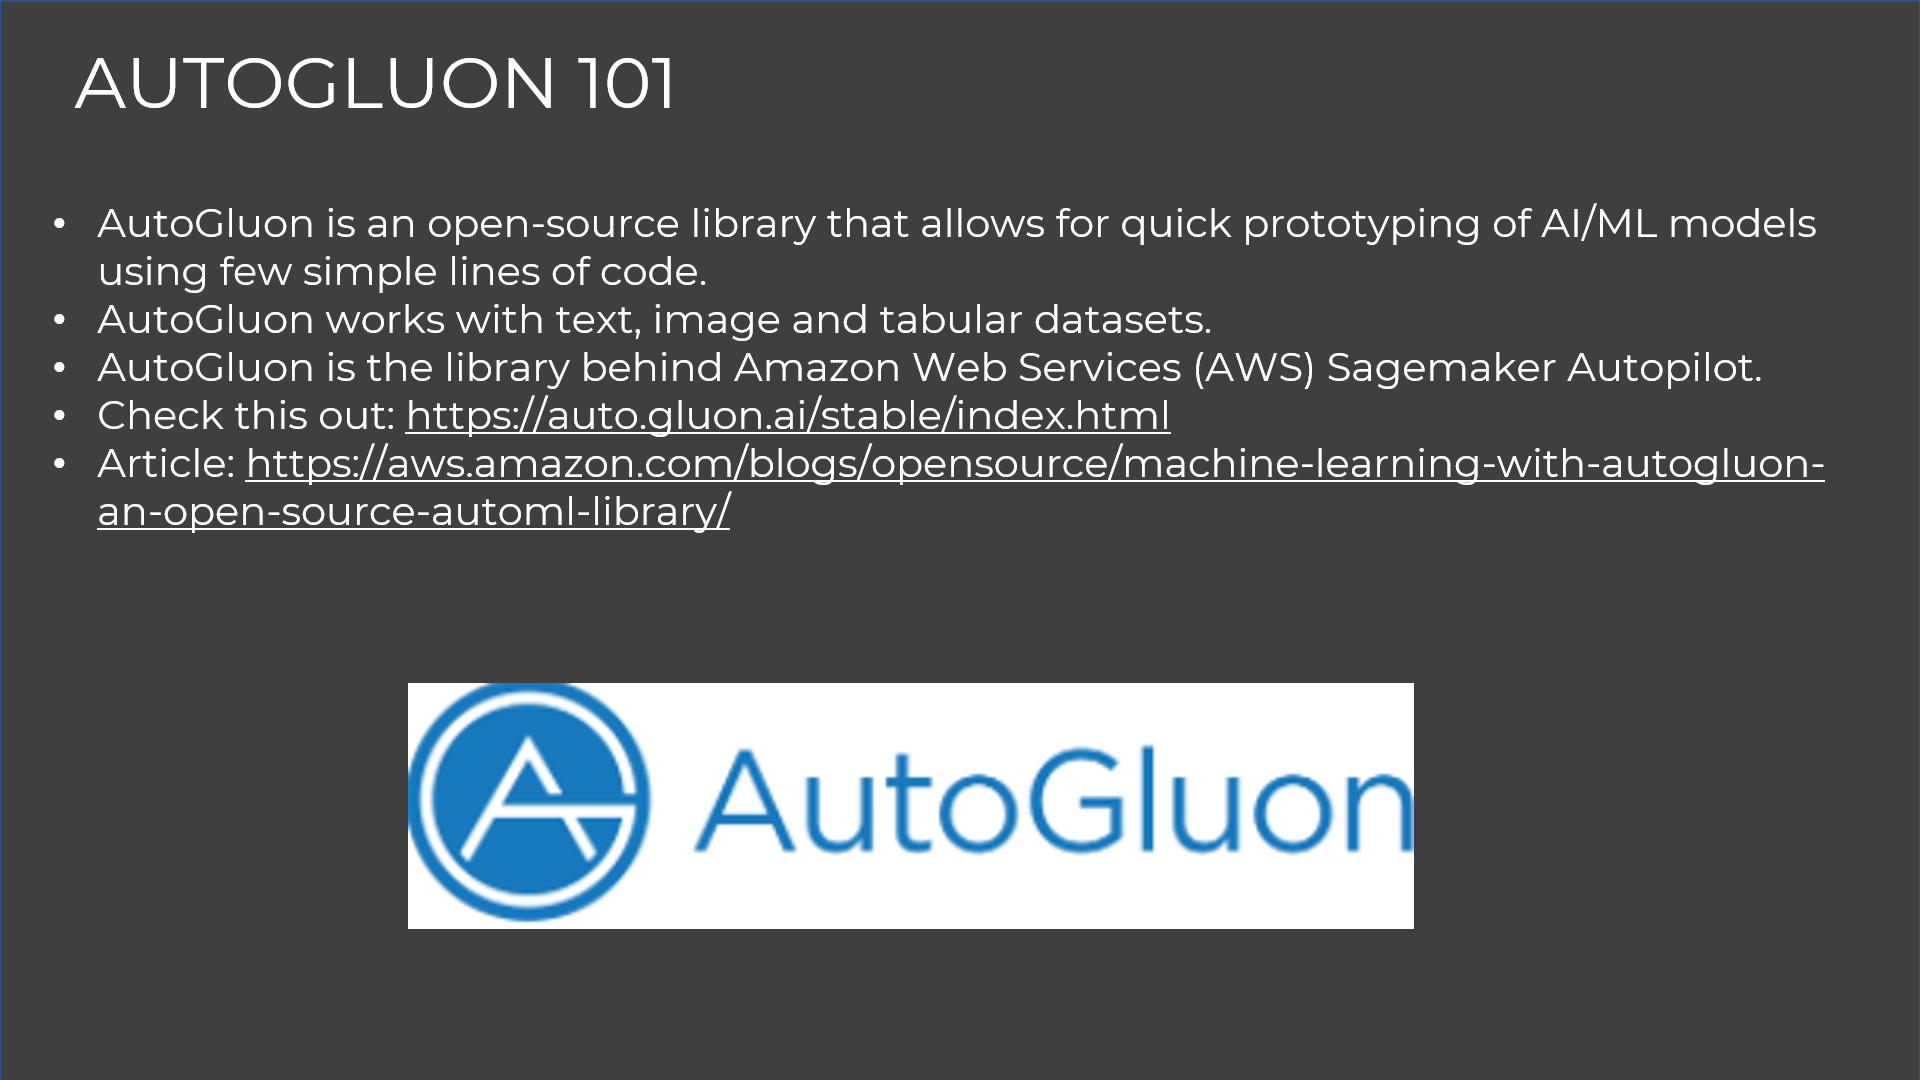

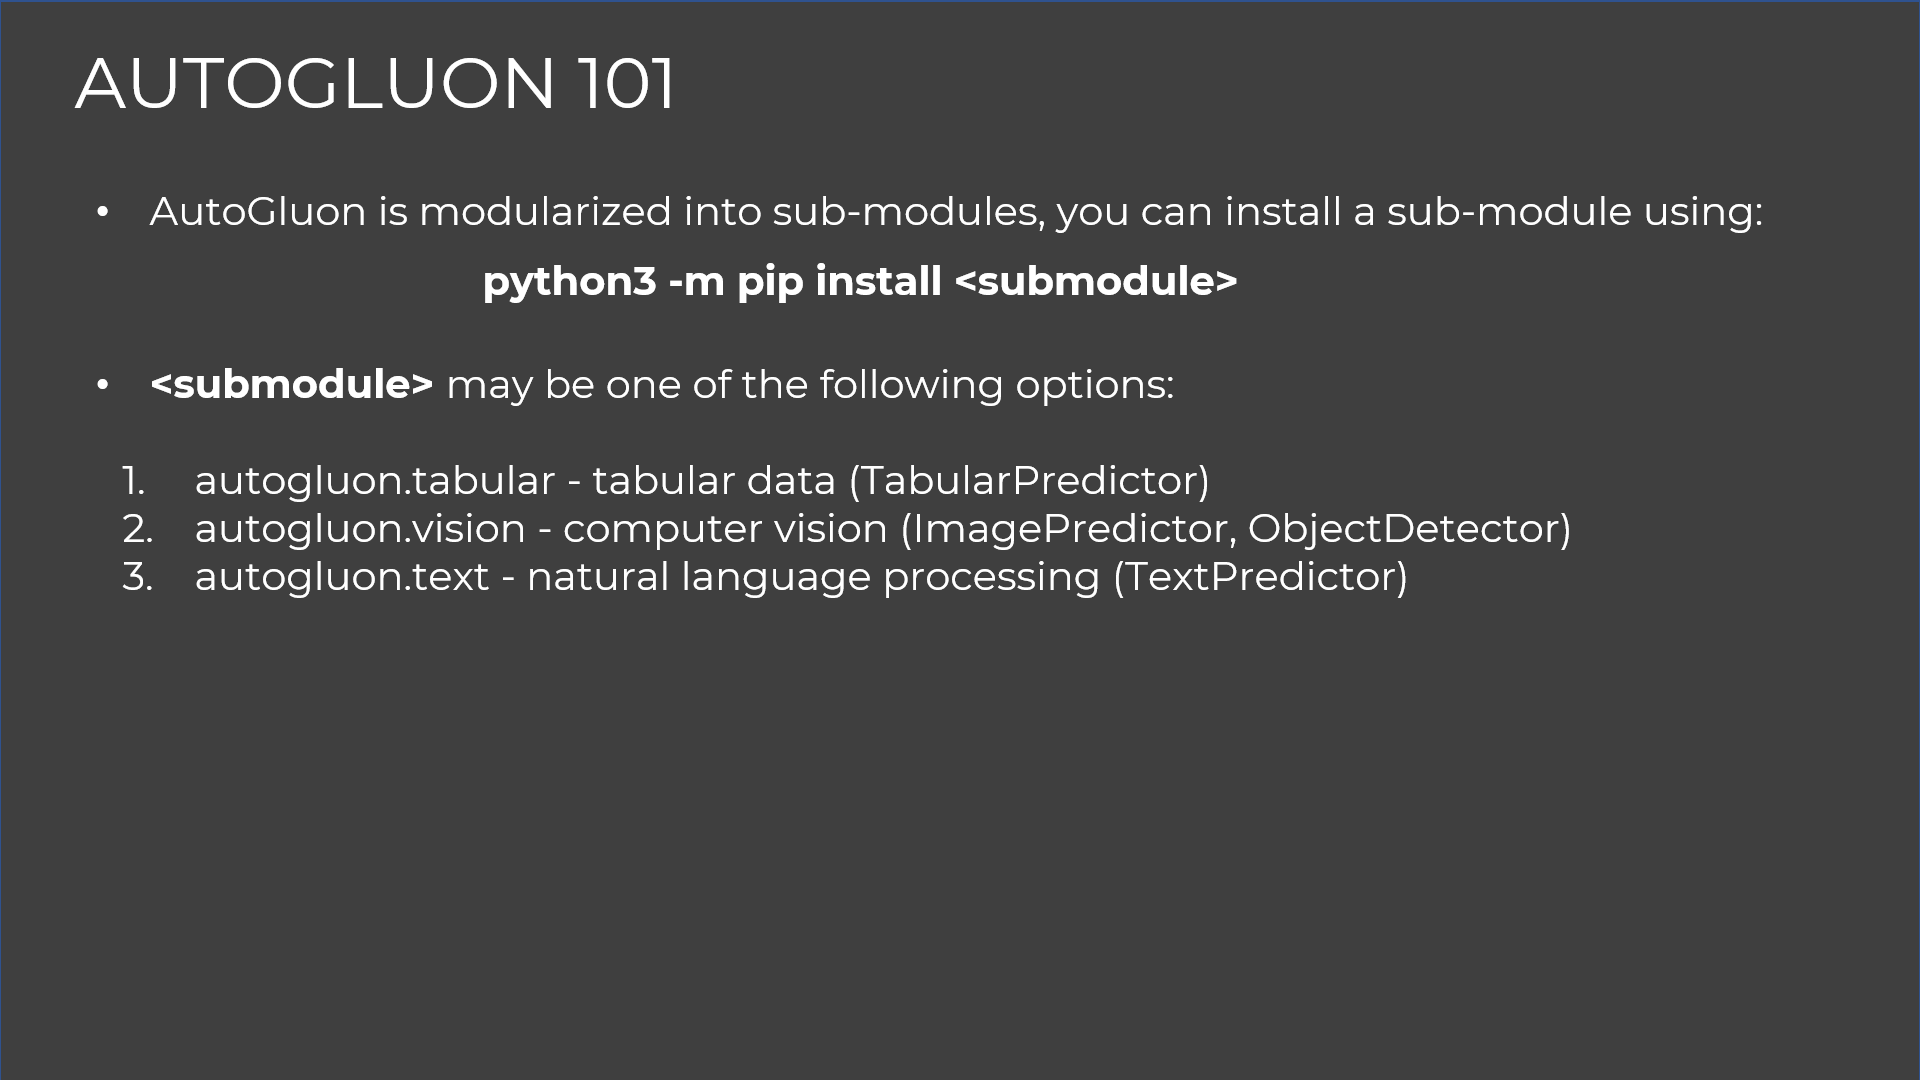

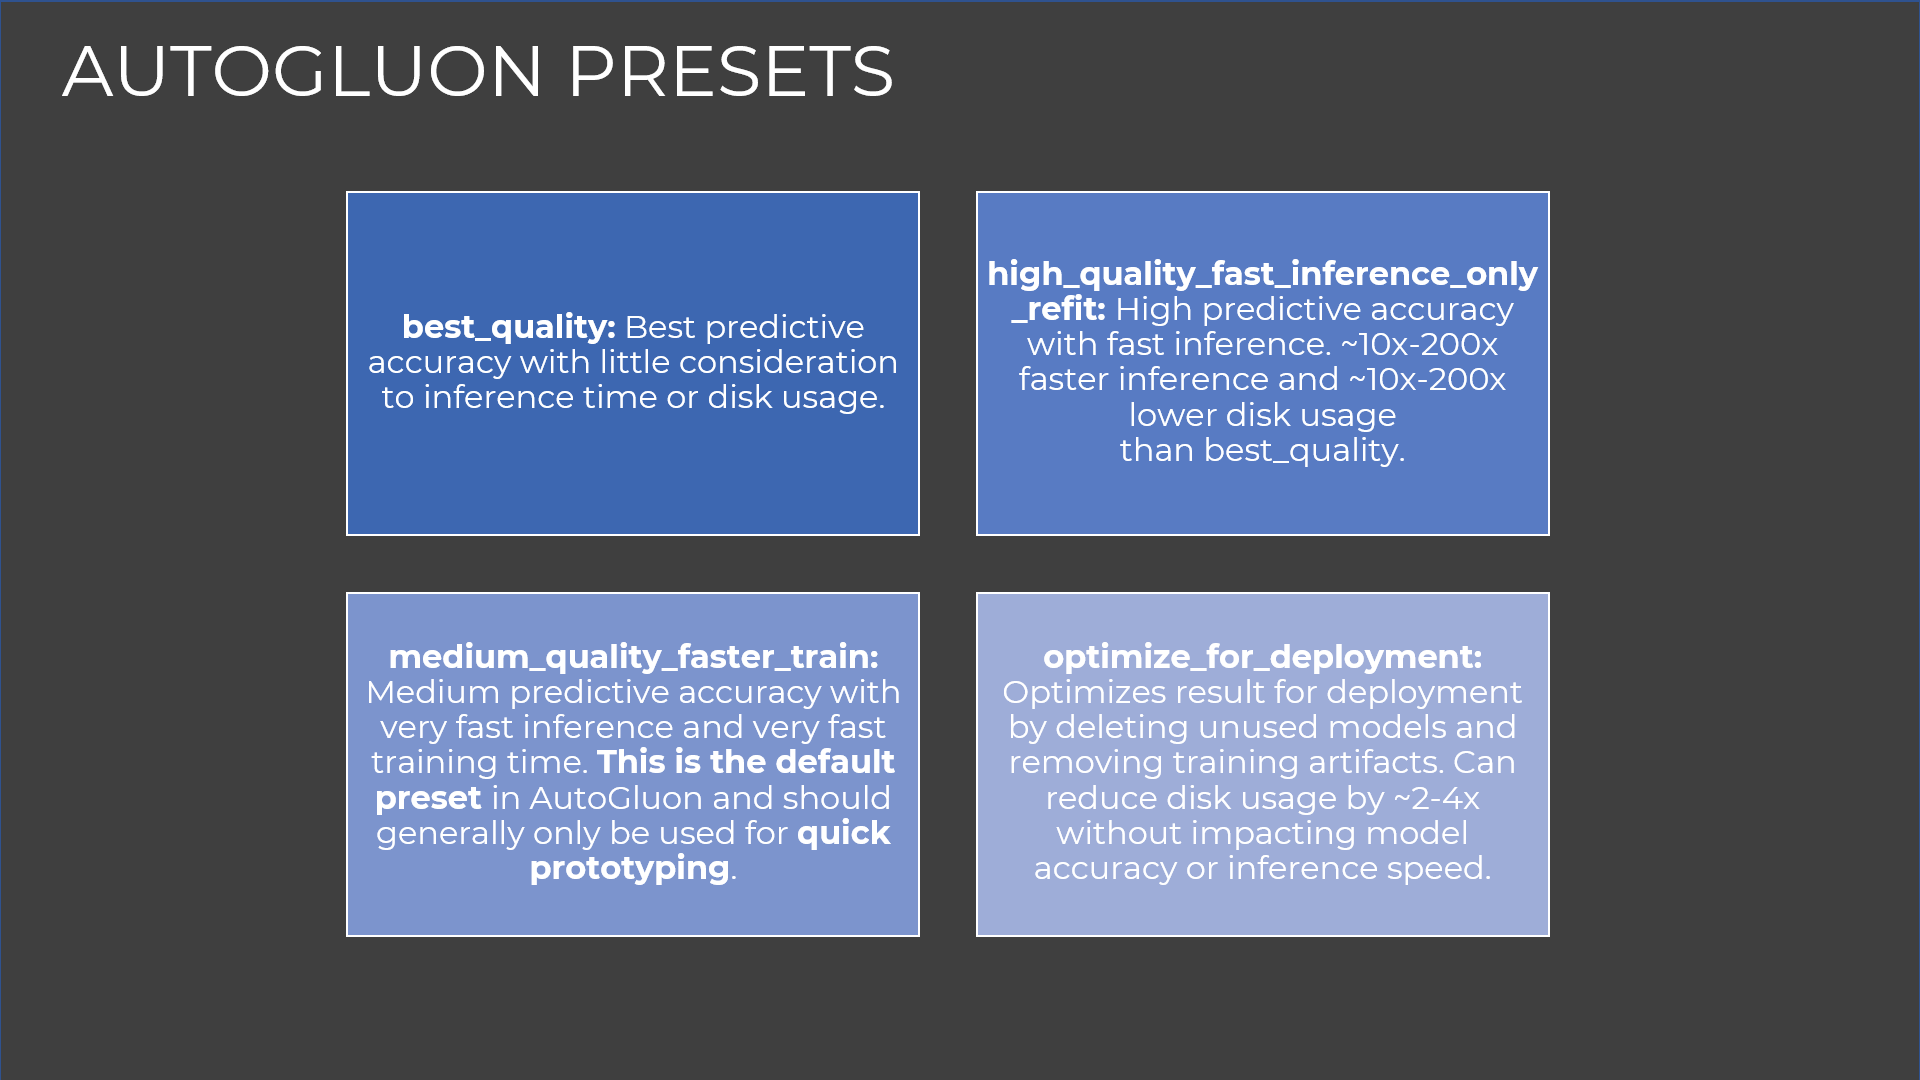

# TASK #6: TRAIN MODELS USING AWS AUTOGLUON

In [16]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [17]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
107,338,117,4,3.5,4.5,9.46,1,0.91
336,319,110,3,3.0,2.5,8.79,0,0.72
71,336,112,5,5.0,5.0,9.76,1,0.96
474,308,105,4,3.0,2.5,7.95,1,0.67
6,321,109,3,3.0,4.0,8.20,1,0.75
...,...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0,0.62
192,322,114,5,4.5,4.0,8.94,1,0.86
117,290,104,4,2.0,2.5,7.46,0,0.45
47,339,119,5,4.5,4.0,9.70,0,0.89


In [18]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68
...,...,...,...,...,...,...,...,...
372,336,119,4,4.5,4.0,9.62,1,0.95
56,316,102,3,2.0,3.0,7.40,0,0.64
440,305,104,2,2.5,1.5,7.79,0,0.53
60,309,100,2,3.0,3.0,8.10,0,0.48


In [19]:
# Train multiple ML regression models using AutoGluon
predictor = TabularPredictor(label = "Chance of Admit", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_125356\"
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220801_125356\"
AutoGluon Version:  0.3.1
Train Data Rows:    400
Train Data Columns: 7
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5495.24 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUnique

In [20]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.823910       0.157007  41.856009                0.000000           0.498003            2       True         12
1       NeuralNetFastAI   0.822058       0.142999  27.881020                0.142999          27.881020            1       True          8
2              CatBoost   0.815952       0.007999  10.421001                0.007999          10.421001            1       True          6
3         ExtraTreesMSE   0.800159       0.105004   1.002001                0.105004           1.002001            1       True          7
4            LightGBMXT   0.792637       0.004007   4.971997                0.004007           4.971997            1       True          3
5               XGBoost   0.777714       0.006009   3.055985                0.006009           3.055985 

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetMXNet': 'TabularNeuralNetModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7179496242830931,
  'KNeighborsDist': 0.7141971985952016,
  'LightGBMXT': 0.7926371553783218,
  'LightGBM': 0.7611102904995282,
  'RandomForestMSE': 0.7683809227852483,
  'CatBoost': 0.8159520990831033,
  'ExtraTreesMSE': 0.8001593026408256,
  'NeuralNetFastAI': 0.8220583468536867,
  'XGBoost': 0.7777139267612858,
  'NeuralNetMXNet': 0.7679776977622945,
  'LightGBMLarge': 0.7512817970308134,
  'WeightedEnsemble_L2': 0.8239103386488715},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels

# TASK #7: EVALUATE TRAINED MODELS PERFORMANCE

In [21]:
predictor.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.823910       0.157007  41.856009                0.000000           0.498003            2       True         12
1       NeuralNetFastAI   0.822058       0.142999  27.881020                0.142999          27.881020            1       True          8
2              CatBoost   0.815952       0.007999  10.421001                0.007999          10.421001            1       True          6
3         ExtraTreesMSE   0.800159       0.105004   1.002001                0.105004           1.002001            1       True          7
4            LightGBMXT   0.792637       0.004007   4.971997                0.004007           4.971997            1       True          3
5               XGBoost   0.777714       0.006009   3.055985                0.006009           3.055985            1       True          9
6       RandomForestMSE   0

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.823910,0.157007,41.856009,0.000000,0.498003,2,True,12
1,NeuralNetFastAI,0.822058,0.142999,27.881020,0.142999,27.881020,1,True,8
2,CatBoost,0.815952,0.007999,10.421001,0.007999,10.421001,1,True,6
3,ExtraTreesMSE,0.800159,0.105004,1.002001,0.105004,1.002001,1,True,7
4,LightGBMXT,0.792637,0.004007,4.971997,0.004007,4.971997,1,True,3
5,XGBoost,0.777714,0.006009,3.055985,0.006009,3.055985,1,True,9
6,RandomForestMSE,0.768381,0.104011,2.816996,0.104011,2.816996,1,True,5
7,NeuralNetMXNet,0.767978,0.019007,39.567017,0.019007,39.567017,1,True,10
8,LightGBM,0.761110,0.002903,0.506099,0.002903,0.506099,1,True,4
9,LightGBMLarge,0.751282,0.004015,0.580988,0.004015,0.580988,1,True,11


                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.823910       0.157007  41.856009                0.000000           0.498003            2       True         12
1       NeuralNetFastAI   0.822058       0.142999  27.881020                0.142999          27.881020            1       True          8
2              CatBoost   0.815952       0.007999  10.421001                0.007999          10.421001            1       True          6
3         ExtraTreesMSE   0.800159       0.105004   1.002001                0.105004           1.002001            1       True          7
4            LightGBMXT   0.792637       0.004007   4.971997                0.004007           4.971997            1       True          3
5               XGBoost   0.777714       0.006009   3.055985                0.006009           3.055985            1       True          9
6       RandomForestMSE   0

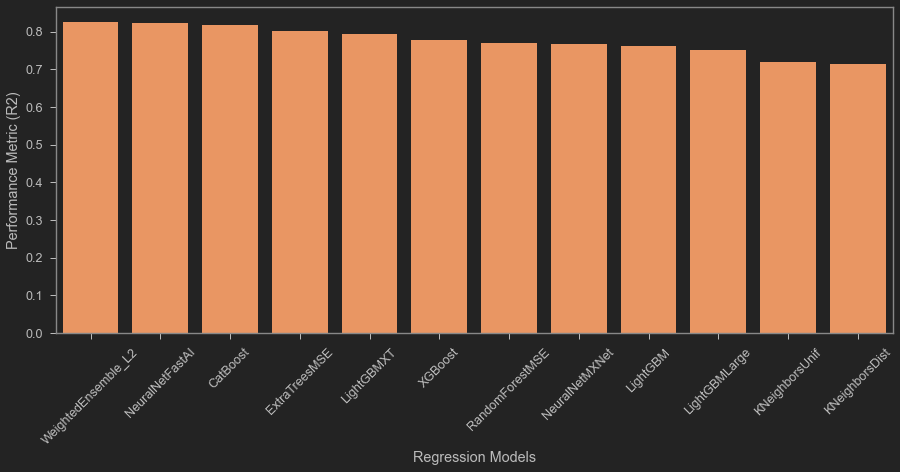

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [23]:
# assess model performance
y_predict = predictor.predict(X_test)
y_predict

90     0.649791
254    0.833523
283    0.764493
445    0.883500
461    0.614836
         ...   
372    0.912299
56     0.561396
440    0.556221
60     0.628279
208    0.642021
Name: Chance of Admit, Length: 100, dtype: float32

In [24]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68
...,...,...,...,...,...,...,...,...
372,336,119,4,4.5,4.0,9.62,1,0.95
56,316,102,3,2.0,3.0,7.40,0,0.64
440,305,104,2,2.5,1.5,7.79,0,0.53
60,309,100,2,3.0,3.0,8.10,0,0.48


In [25]:
y_test = X_test['Chance of Admit']
y_test #groundtruth

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
       ... 
372    0.95
56     0.64
440    0.53
60     0.48
208    0.64
Name: Chance of Admit, Length: 100, dtype: float64

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.062 
MSE = 0.0038488152853969155 
MAE = 0.044679030883312223 
R2 = 0.7796237973405336


# FINAL CAPSTONE PROJECT

Please complete the following tasks:
1. Load the “bike_demand.csv” dataset
2. Perform basic Exploratory Data Analysis
3. Split the data into 80% for training and 20% for testing 
4. Using ‘best_quality’ preset and R2 metric, train machine linear regression models using AutoGluon to predict the “bike_demand” column
5. Assess trained models' performance by plotting the leaderboard and indicate the best model

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:** 
- **Calculate the average, minimum and maximum TOEFL Score in the DataFrame**

In [53]:
df['Chance of Admit'].max()

0.97

In [54]:
df['Chance of Admit'].min()

0.34

In [55]:
df['Chance of Admit'].mean()

0.72174

**PRACTICE OPPORTUNITY #2 SOLUTION:**
 - **Calculate the correlation matrix and display a heatmap using Seaborn**
 - **Which feature has the most positive correlation with chances of university admission?**

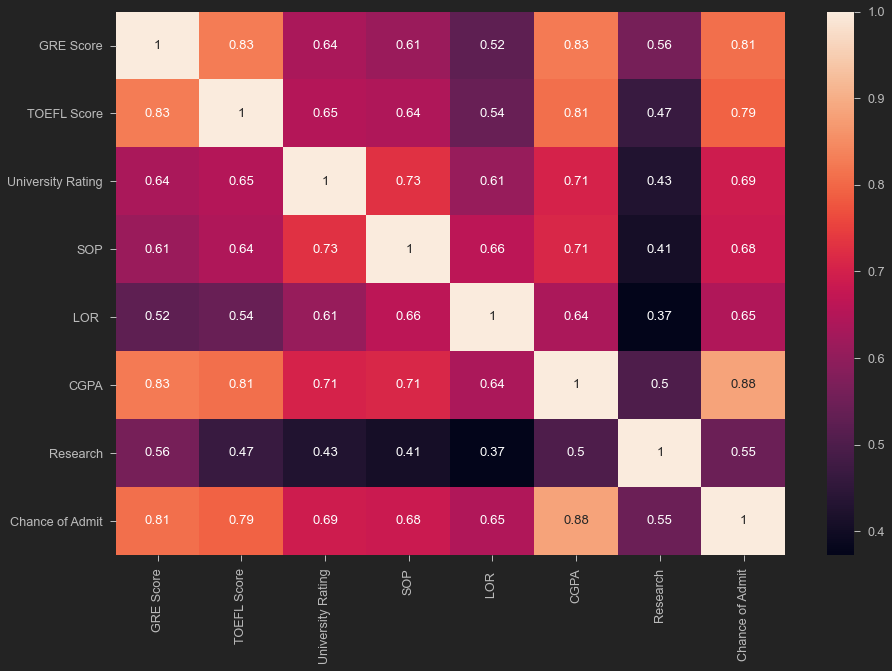

In [31]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True);
# GPA has highest correlation with Chances of Admission

# FINAL CAPSTONE PROJECT SOLUTION

In [33]:
df = pd.read_csv('bike_demand.csv')

In [34]:
# Explore the first five rows in the DataFrame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,bike_demand
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [35]:
# Explore the last five rows in the DataFrame
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,bike_demand
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,2729


In [36]:
# Generate statistical summary
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,bike_demand
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [37]:
# Obtain dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   dteday       731 non-null    object 
 2   season       731 non-null    int64  
 3   yr           731 non-null    int64  
 4   mnth         731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  hum          731 non-null    float64
 11  windspeed    731 non-null    float64
 12  bike_demand  731 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 74.4+ KB


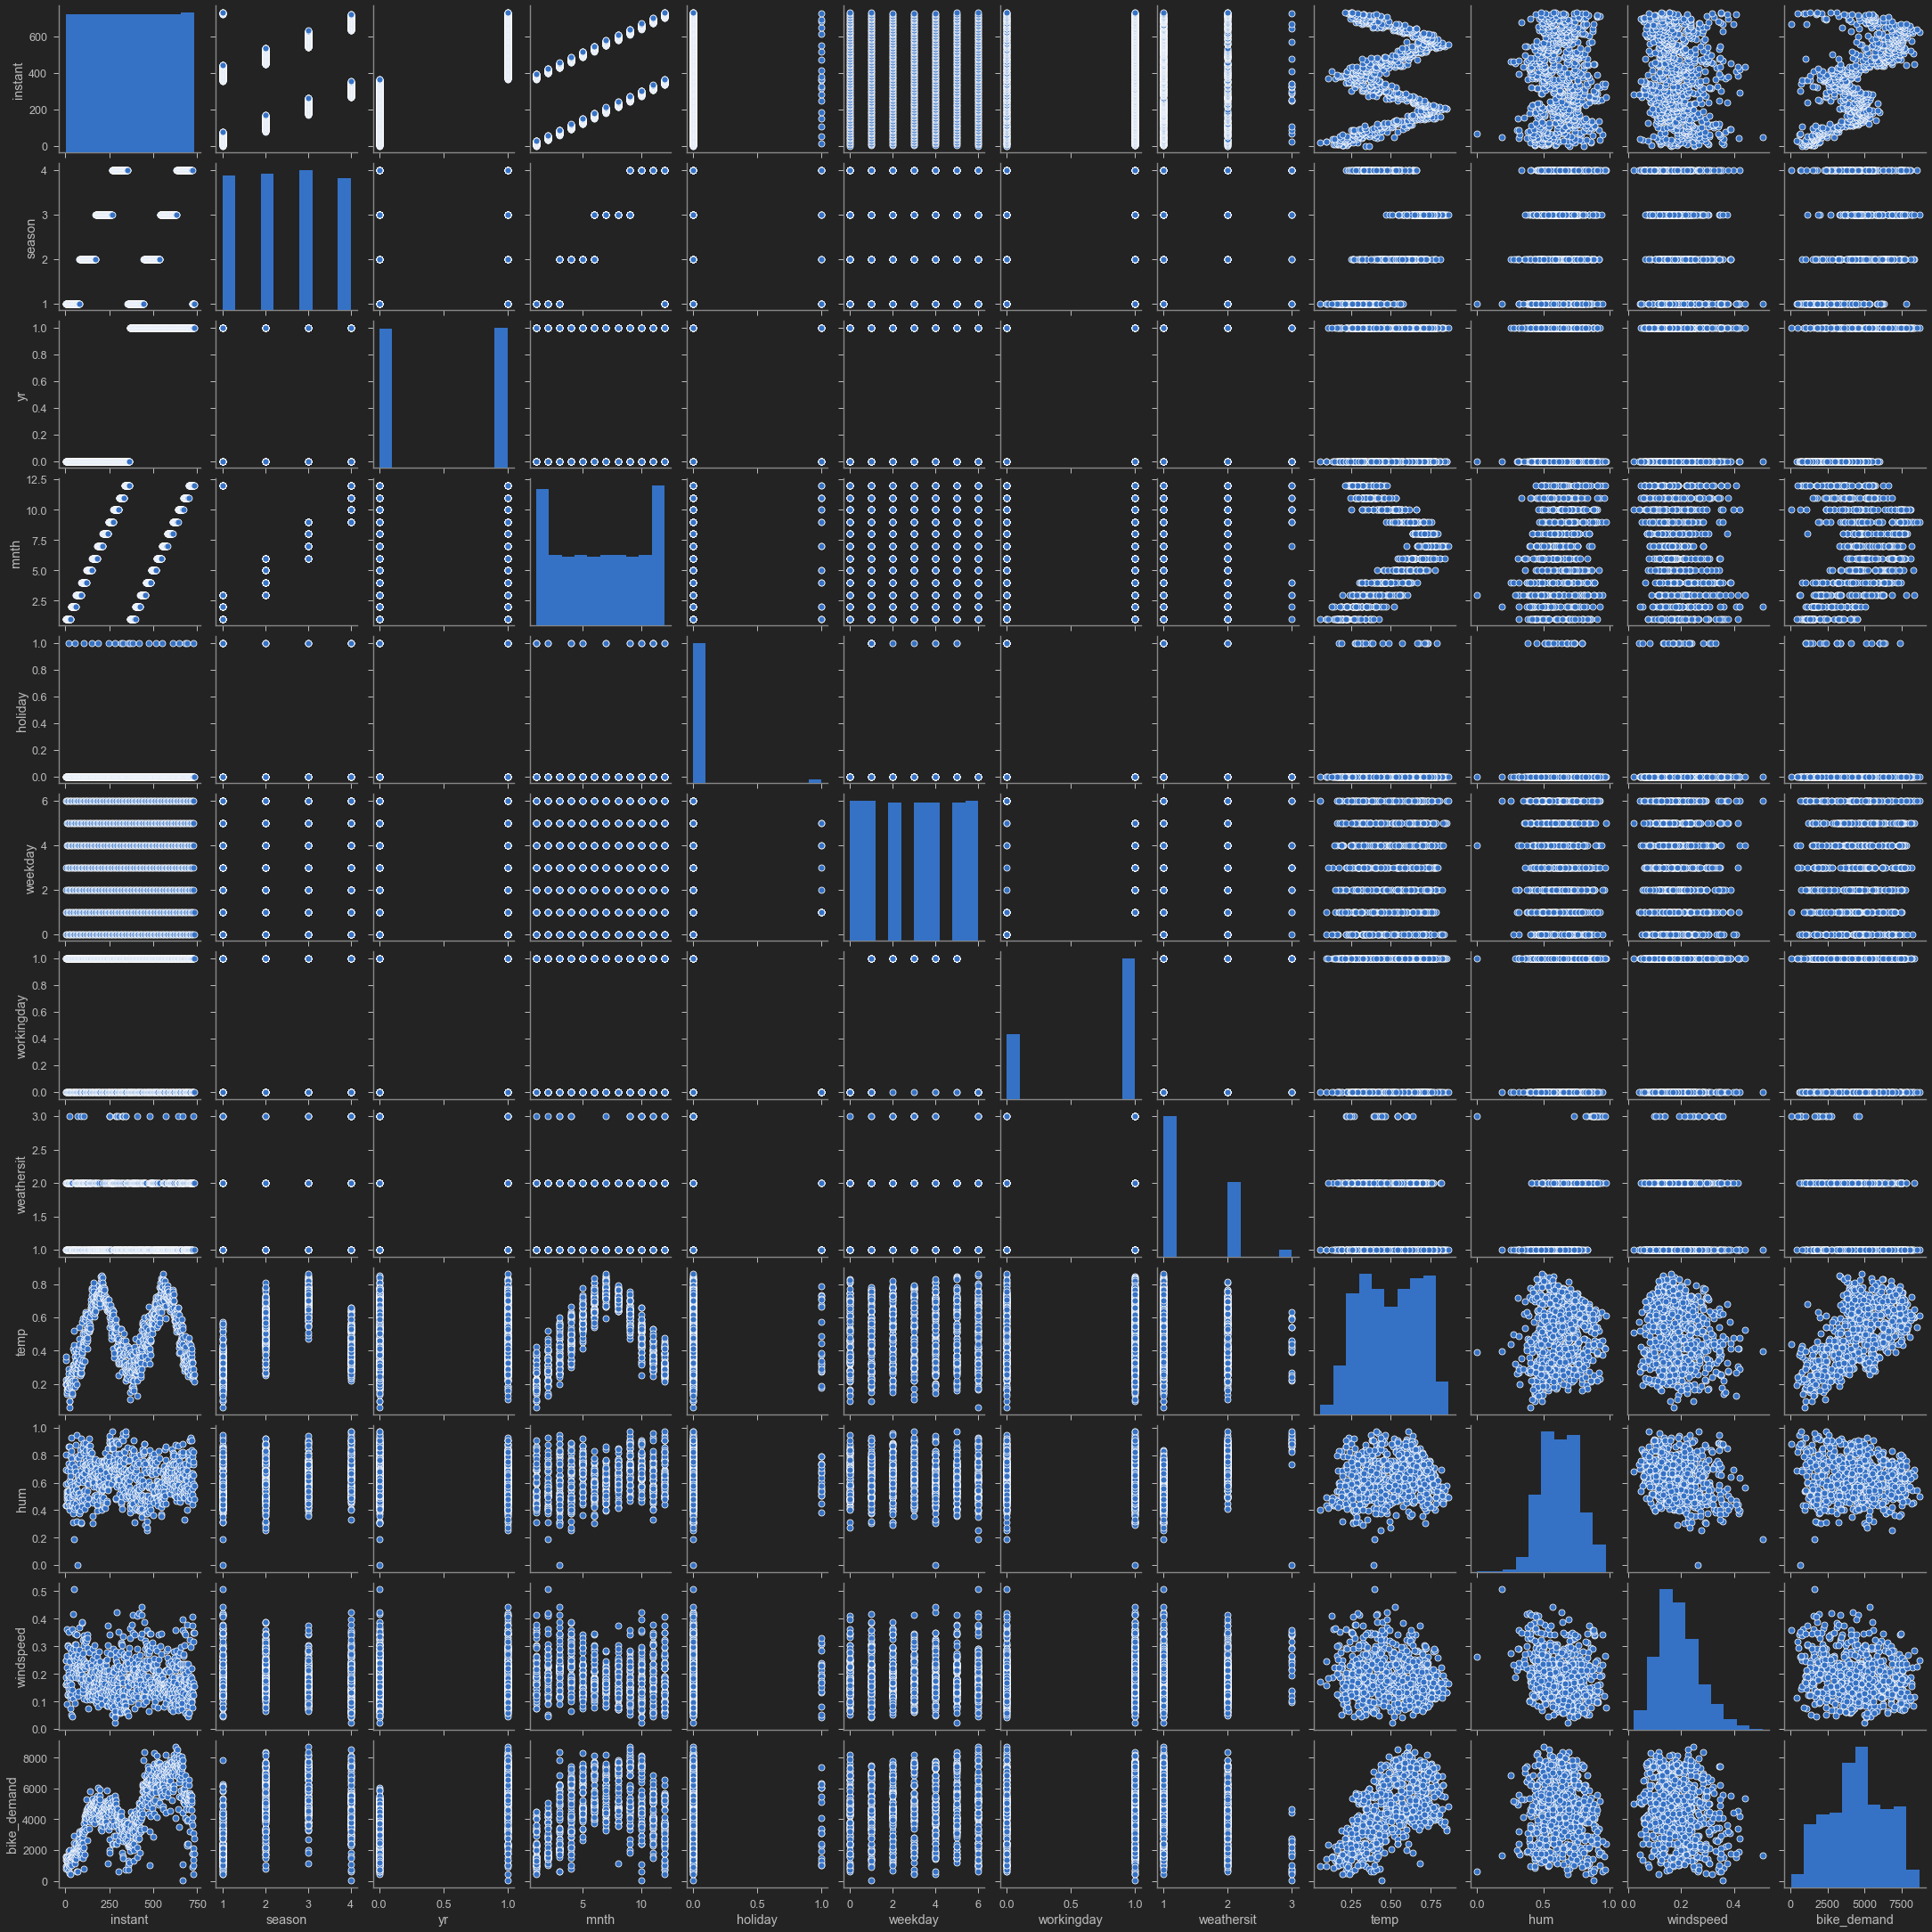

In [38]:
# plot pairplot
sns.pairplot(df);

In [39]:
df.drop(['instant', 'dteday'], inplace = True, axis = 1)

In [40]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [41]:
# Train multiple ML Regression models using AutoGluon
predictor = TabularPredictor(label = "bike_demand", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220801_130159\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220801_130159\"
AutoGluon Version:  0.3.1
Train Data Rows:    584
Train Data Columns: 10
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5479.12 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerat

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l2: 23.975	train_set's r2: 0.999993	valid_set's l2: 471809	valid_set's r2: 0.884497


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.8735	 = Validation score   (r2)
	10.48s	 = Training   runtime
	0.08s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 199.9s of the 59.93s of remaining time.
	0.9022	 = Validation score   (r2)
	0.57s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 140.67s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220801_130159\")


In [42]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.902215       0.290114  130.124565                0.001004           0.565009            2       True         12
1          CatBoost_BAG_L1   0.894456       0.011003    7.133935                0.011003           7.133935            1       True          6
2        LightGBMXT_BAG_L1   0.893769       0.045007   21.647930                0.045007          21.647930            1       True          3
3          LightGBM_BAG_L1   0.884404       0.026040    8.966890                0.026040           8.966890            1       True          4
4     ExtraTreesMSE_BAG_L1   0.880508       0.157015    0.858974                0.157015           0.858974            1       True          7
5    NeuralNetMXNet_BAG_L1   0.880049       0.096996   75.776964                

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.4415612156863461,
  'KNeighborsDist_BAG_L1': 0.3608648751784078,
  'LightGBMXT_BAG_L1': 0.8937686822654636,
  'LightGBM_BAG_L1': 0.8844035147343002,
  'RandomForestMSE_BAG_L1': 0.8682220530930902,
  'CatBoost_BAG_L1': 0.8944555475570818,
  'ExtraTreesMSE_BAG_L1': 0.8805

In [43]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.902215       0.290114  130.124565                0.001004           0.565009            2       True         12
1          CatBoost_BAG_L1   0.894456       0.011003    7.133935                0.011003           7.133935            1       True          6
2        LightGBMXT_BAG_L1   0.893769       0.045007   21.647930                0.045007          21.647930            1       True          3
3          LightGBM_BAG_L1   0.884404       0.026040    8.966890                0.026040           8.966890            1       True          4
4     ExtraTreesMSE_BAG_L1   0.880508       0.157015    0.858974                0.157015           0.858974            1       True          7
5    NeuralNetMXNet_BAG_L1   0.880049       0.096996   75.776964                0.096996          75.776964            1       True         10

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.902215,0.290114,130.124565,0.001004,0.565009,2,True,12
1,CatBoost_BAG_L1,0.894456,0.011003,7.133935,0.011003,7.133935,1,True,6
2,LightGBMXT_BAG_L1,0.893769,0.045007,21.647930,0.045007,21.647930,1,True,3
3,LightGBM_BAG_L1,0.884404,0.026040,8.966890,0.026040,8.966890,1,True,4
4,ExtraTreesMSE_BAG_L1,0.880508,0.157015,0.858974,0.157015,0.858974,1,True,7
5,NeuralNetMXNet_BAG_L1,0.880049,0.096996,75.776964,0.096996,75.776964,1,True,10
6,LightGBMLarge_BAG_L1,0.873476,0.077025,10.476931,0.077025,10.476931,1,True,11
7,XGBoost_BAG_L1,0.870203,0.033040,5.556907,0.033040,5.556907,1,True,9
8,RandomForestMSE_BAG_L1,0.868222,0.165012,1.092979,0.165012,1.092979,1,True,5
9,NeuralNetFastAI_BAG_L1,0.831507,0.100024,4.848974,0.100024,4.848974,1,True,8


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.902215       0.290114  130.124565                0.001004           0.565009            2       True         12
1          CatBoost_BAG_L1   0.894456       0.011003    7.133935                0.011003           7.133935            1       True          6
2        LightGBMXT_BAG_L1   0.893769       0.045007   21.647930                0.045007          21.647930            1       True          3
3          LightGBM_BAG_L1   0.884404       0.026040    8.966890                0.026040           8.966890            1       True          4
4     ExtraTreesMSE_BAG_L1   0.880508       0.157015    0.858974                0.157015           0.858974            1       True          7
5    NeuralNetMXNet_BAG_L1   0.880049       0.096996   75.776964                0.096996          75.776964            1       True         10

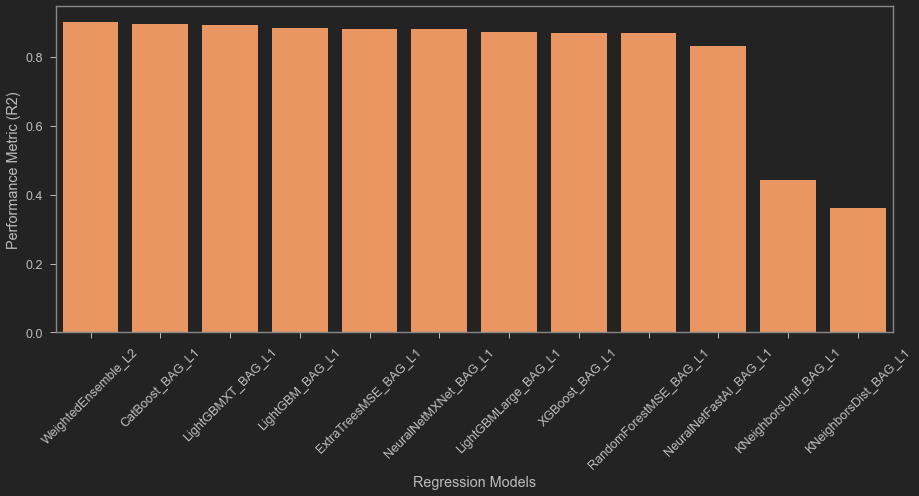

In [44]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [45]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.9077962783975355
Evaluations on test data:
{
    "r2": 0.9077962783975355,
    "root_mean_squared_error": -626.2232804610035,
    "mean_squared_error": -392155.59699134063,
    "mean_absolute_error": -446.1065590787096,
    "pearsonr": 0.9553419151748893,
    "median_absolute_error": -302.52880859375
}


{'r2': 0.9077962783975355,
 'root_mean_squared_error': -626.2232804610035,
 'mean_squared_error': -392155.59699134063,
 'mean_absolute_error': -446.1065590787096,
 'pearsonr': 0.9553419151748893,
 'median_absolute_error': -302.52880859375}

In [46]:
# assess model performance
y_pred = predictor.predict(X_test)

In [47]:
y_test = X_test['bike_demand']
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: bike_demand, Length: 147, dtype: int64

Text(0, 0.5, 'True Values')

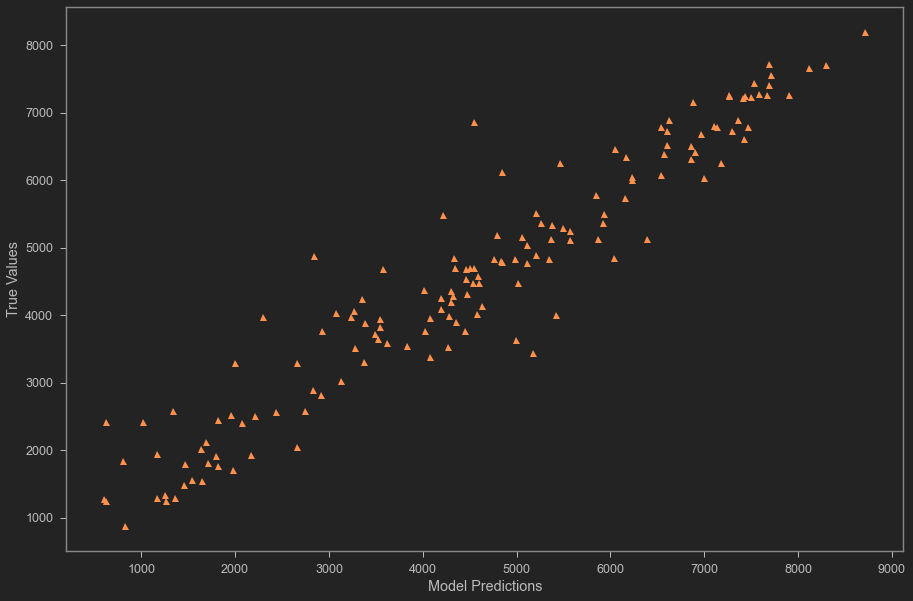

In [48]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'y')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 626.223 
MSE = 392155.59699134063 
MAE = 446.1065590787096 
R2 = 0.9077962783975355


# GREAT JOB!